## Day 13 Logistic Regression
23/Dec/2021 Thursday

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Data Generation

In [13]:
n = 200
X1 = np.random.multivariate_normal([3,2], [[1, 2], [2, 1]], size= n) # y=1 class
X2 = np.random.multivariate_normal([7,9], [[1, 3], [3, 1]], size= n) # y=0 class

y1 = np.ones((n,))
y2 = np.zeros((n,))
print(X1.shape, X2.shape, y1.shape, y2.shape)

X = np.concatenate([X1, X2], axis=0)
y = np.concatenate([y1, y2], axis=0)

print(X.shape, y.shape)

ix = np.arange(0, len(X))
np.random.shuffle(ix)

X = X[ix]
y = y[ix]

(200, 2) (200, 2) (200,) (200,)
(400, 2) (400,)


<ipython-input-13-5c16799fd920>:2: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal([3,2], [[1, 2], [2, 1]], size= n) # y=1 class
<ipython-input-13-5c16799fd920>:3: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal([7,9], [[1, 3], [3, 1]], size= n) # y=0 class


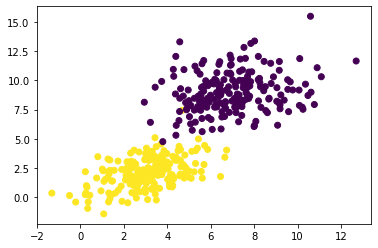

In [14]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [43]:
class LogisticRegression:
    
    def predict(self, X):
        """ 
        X: Feature matrix (m, n)
        m is number of samples, n is no. of features
        """
        if self.w.shape[0] != X.shape[1]:
            X = X.copy()
            ones_column = np.ones((len(X),1))
            X = np.concatenate([ones_column, X], axis=1)
        return self.sigmoid(X.dot(self.w))
    
    def sigmoid(self, z):
        return 1/(1+np.e**(-z))
    
    def loss(self, ytrue, ypred):
        return -(ytrue*np.log(ypred + 1e-7) + (1-ytrue)*np.log(1-ypred+1e-7)).sum()
    
    def accuracy(self, ytrue, ypred):
         return (ytrue == (ypred > 0.5).astype('int')).mean()
    
    def sum_of_residuals(self, y, yhat):
        return (y-yhat).sum()
    
    def __get_gradient(self, X, y, y_hat):
        grad = []
        for j in range(X.shape[1]):
            g = -((y - y_hat) * (X[:,j].reshape(-1,1))).sum()
            grad.append(g)
        return np.array(grad).reshape(-1,1)
            
    def __gradient_descent(self, X, y, epochs, learning_rate, batch_size):
        idx = np.arange(0, len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        itr = len(X)//batch_size
        
        losses = []
        for i in range(epochs):
            for j in range(itr):
                X_batch, y_batch = X[j*batch_size : (j+1)*batch_size], y[j*batch_size : (j+1)*batch_size]
                y_hat_batch = self.predict(X_batch) 
                grad = self.__get_gradient(X_batch, y_batch, y_hat_batch)
                self.w = self.w - learning_rate*grad
                
            yhat = self.predict(X)
            loss = self.loss(y, yhat)
            losses.append(loss)
            acc = self.accuracy(y, yhat)
            sor = self.sum_of_residuals(y, yhat)
            print(f"Epoch: {i+1}/{epochs} Loss: {loss}, accuracy: {acc}, SoR: {sor}")
#             print(f"\rEpoch: {i+1}/{epochs} Loss: {loss}, r2: {r2}, SoR: {sor}", end="")
            
        return losses
    
    def fit(self, X, y, epochs=1000, learning_rate=0.01, method='batch', **kwargs):
        """ 
        Trains the model. Finds the optimal weights in 
               y_hat = w0 + w1.x1 + w2.x2 + . . . + wn.xn
        X: Feature matrix (m,n)
        y: True Label vector (m,1)
        epochs: int value, no. of times you iterate over the entire data
        learning_rate: alpha in the update rule
        method: ('batch', 'mini-batch', 'stochastic')
        kwargs: variable keyword arguments, batch_size 
        """
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)
        self.w = np.random.rand(X.shape[1], 1)
        
        if method == 'batch':
            batch_size = X.shape[0]
            
        elif method == 'mini-batch':
            if kwargs.get('batch_size')==None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']
                
        elif method == 'stochastic':
            batch_size = 1
                
        return self.__gradient_descent(X, y, epochs, learning_rate, batch_size)

In [44]:
logr = LogisticRegression()
losses = logr.fit(X, y.reshape(-1,1), epochs=300, learning_rate=0.01, method='batch')

Epoch: 1/300 Loss: 3101.1071718192625, accuracy: 0.515, SoR: 194.26725822596563
Epoch: 2/300 Loss: 3033.1188539414143, accuracy: 0.515, SoR: 194.00984047091896
Epoch: 3/300 Loss: 2529.6897239036753, accuracy: 0.5375, SoR: 184.73971105266642
Epoch: 4/300 Loss: 678.8692846536015, accuracy: 0.76, SoR: -66.44510830434261
Epoch: 5/300 Loss: 2637.1841933037485, accuracy: 0.54, SoR: 183.99711488141884
Epoch: 6/300 Loss: 247.2079284541679, accuracy: 0.8725, SoR: 30.495837653002763
Epoch: 7/300 Loss: 243.7128175635121, accuracy: 0.8775, SoR: 8.80478688765191
Epoch: 8/300 Loss: 344.70562224310436, accuracy: 0.85, SoR: 63.88468994856523
Epoch: 9/300 Loss: 1067.4009151230036, accuracy: 0.6775, SoR: -113.53314610830975
Epoch: 10/300 Loss: 2859.160848144809, accuracy: 0.53, SoR: 187.56831578471403
Epoch: 11/300 Loss: 1377.665821513113, accuracy: 0.66, SoR: 136.32484877788727
Epoch: 12/300 Loss: 831.4747206405865, accuracy: 0.7575, SoR: -76.58790446836528
Epoch: 13/300 Loss: 2352.3852917128806, accur

Epoch: 144/300 Loss: 12.693683919224895, accuracy: 0.995, SoR: -0.10138217853191844
Epoch: 145/300 Loss: 12.67271240567974, accuracy: 0.995, SoR: -0.10381603152233276
Epoch: 146/300 Loss: 12.652229613831166, accuracy: 0.995, SoR: -0.10618090683539017
Epoch: 147/300 Loss: 12.632222501287563, accuracy: 0.995, SoR: -0.10847913165068224
Epoch: 148/300 Loss: 12.612678532215071, accuracy: 0.995, SoR: -0.11071293873628418
Epoch: 149/300 Loss: 12.5935856506601, accuracy: 0.995, SoR: -0.11288447075044056
Epoch: 150/300 Loss: 12.57493225540909, accuracy: 0.995, SoR: -0.11499578433961749
Epoch: 151/300 Loss: 12.556707176292262, accuracy: 0.995, SoR: -0.11704885404208754
Epoch: 152/300 Loss: 12.538899651844012, accuracy: 0.995, SoR: -0.1190455760057732
Epoch: 153/300 Loss: 12.52149930823829, accuracy: 0.995, SoR: -0.1209877715289221
Epoch: 154/300 Loss: 12.504496139422583, accuracy: 0.995, SoR: -0.12287719043167022
Epoch: 155/300 Loss: 12.487880488379153, accuracy: 0.995, SoR: -0.1247155142665975


Epoch: 292/300 Loss: 11.8241677800187, accuracy: 0.9925, SoR: -0.19261017998785468
Epoch: 293/300 Loss: 11.823496529595293, accuracy: 0.9925, SoR: -0.1926364283910309
Epoch: 294/300 Loss: 11.822835310664082, accuracy: 0.9925, SoR: -0.19266080219352988
Epoch: 295/300 Loss: 11.82218379189868, accuracy: 0.9925, SoR: -0.19268333941868576
Epoch: 296/300 Loss: 11.821541652403127, accuracy: 0.9925, SoR: -0.19270407729282424
Epoch: 297/300 Loss: 11.820908581423929, accuracy: 0.9925, SoR: -0.19272305226285225
Epoch: 298/300 Loss: 11.820284278068028, accuracy: 0.9925, SoR: -0.19274030001327808
Epoch: 299/300 Loss: 11.819668451026772, accuracy: 0.9925, SoR: -0.19275585548298396
Epoch: 300/300 Loss: 11.819060818305765, accuracy: 0.9925, SoR: -0.19276975288146236


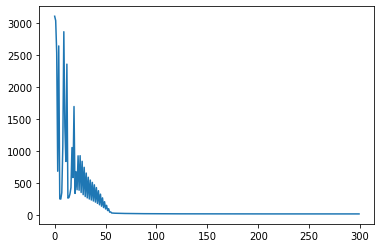

In [48]:
# plt.figure(dpi=300)
plt.plot(losses)
plt.show()

In [49]:
logr.w

array([[19.09871763],
       [-0.69318721],
       [-2.97893826]])

In [54]:
ypred = logr.predict(X)
ypred[:10]

array([[9.99999978e-01],
       [2.28717480e-09],
       [8.87745742e-03],
       [8.94102382e-05],
       [7.69926656e-11],
       [9.98576047e-01],
       [4.09130039e-07],
       [2.90970269e-04],
       [6.87911649e-04],
       [2.56063717e-05]])

In [53]:
logr.accuracy(y.reshape(-1,1), ypred)

0.9925